In [188]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

from tqdm.notebook import trange, tqdm

In [189]:
df = pd.read_csv('./mixed_guassian_dataset.csv')
df.describe()

,x
count,200000.000000
mean,3.499169
std,2.217177
min,-5.534819
25%,1.938795
50%,2.316471
75%,5.002645
max,14.743792


In [190]:
data = df.x.values
data

array([1.95114156, 3.05669659, 7.37366354, ..., 8.80098378, 1.81541894,
       1.83684851])

<AxesSubplot: ylabel='Density'>

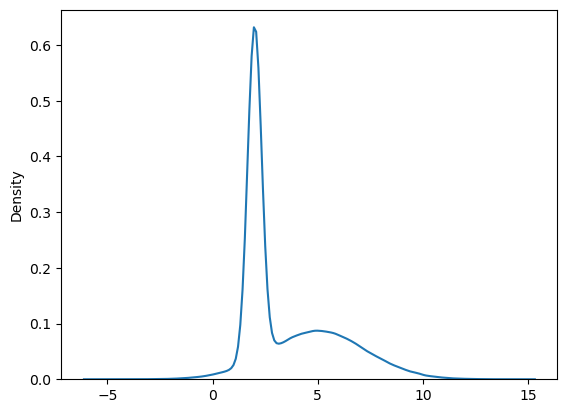

In [191]:
sns.kdeplot(data)

<AxesSubplot: ylabel='Count'>

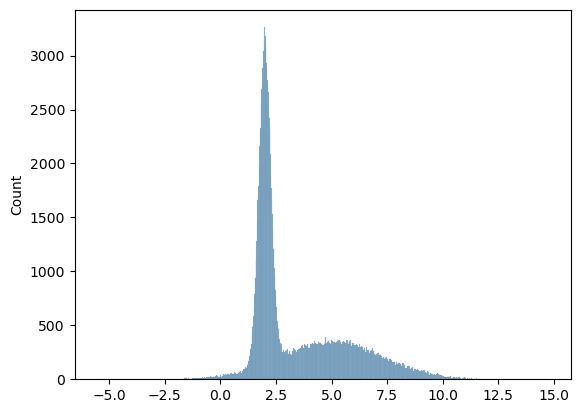

In [192]:
sns.histplot(data, bins=1000, alpha=0.5)

In [238]:
# mu = [2, 5]
# sigma = [0.2, 1.5]

def calculate_phi(x, mu, sigma):
    n = [ norm.pdf(x, loc=mu[i], scale=sigma[i]) for i in range(2) ] 
    phi = n[0] / n[0] + n[1]
    return phi


In [245]:
def update(x, mu, sigma, alpha):

    for i in range(2):
        phi = calculate_phi(x, mu, sigma)
        mu[i] += alpha * np.dot(x - mu[i], phi) / sigma[i]**2
        phi = calculate_phi(x, mu, sigma)
        sigma[i] += alpha * (np.dot(phi, np.square(x - mu[i]))/ sigma[i]**3 - phi.sum()/sigma[i])

    print(mu, sigma)
    return mu, sigma


In [246]:
def log_likelihood(x, mu, sigma, epsilon=1e-10):
    n = [ norm.pdf(x, loc=mu[i], scale=sigma[i]) for i in range(2) ]
    f = np.clip(n[0] + n[1], epsilon, None)
    return np.log(f).sum()

In [267]:
lr = 1e-6
epochs = 1000

mu = [1.5, 6]
sigma = [0.5, 2]

history_mu, history_sigma = [mu.copy()], [sigma.copy()]
history_likelihood = [log_likelihood(data, mu, sigma)]


for epoch in trange(epochs):
    mu, sigma = update(data, mu, sigma, lr)
    history_mu.append(mu.copy())
    history_sigma.append(sigma.copy())
    history_likelihood.append(log_likelihood(data, mu, sigma))


  0%|          | 0/1000 [00:00<?, ?it/s]

[3.3078281127265954, 5.870892112182946] [8.761902485773543, 2.165150402840079]
[3.308606410247623, 5.7655588126312] [8.738864162478766, 2.272042926452345]
[3.3093584071979225, 5.673631483656892] [8.715707400120326, 2.349233227435044]
[3.3100907070130017, 5.590771847500817] [8.692445951405576, 2.4078114445953]
[3.3108073562431253, 5.514628364410034] [8.669088151234385, 2.45345727322204]
[3.3115110802387453, 5.443745430867513] [8.645639423926823, 2.489527839692079]
[3.3122038267463414, 5.377144208579087] [8.6221034543678, 2.518195290183809]
[3.3128870461672126, 5.314127791299471] [8.598482811376138, 2.5409566373049564]
[3.313561851547935, 5.254178796789334] [8.574779309586154, 2.558893215904946]
[3.3142291167608624, 5.196900636636573] [8.550994233268206, 2.572815191007183]
[3.314889540132636, 5.141981556248022] [8.52712848170271, 2.5833477009621437]
[3.315543687491529, 5.089171460611989] [8.503182667387373, 2.5909850131260117]
[3.316192022327548, 5.0382663512135215] [8.479157184573172, 2

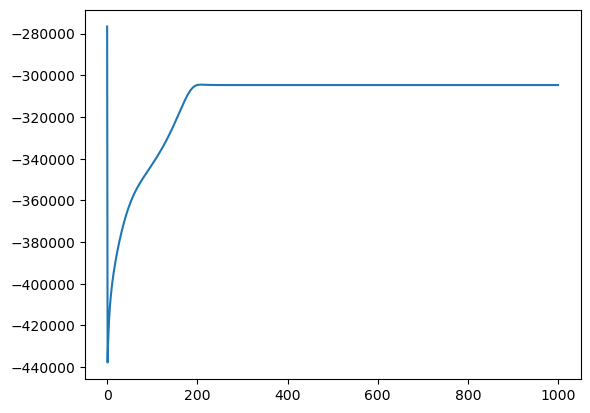

In [268]:
plt.plot(history_likelihood)

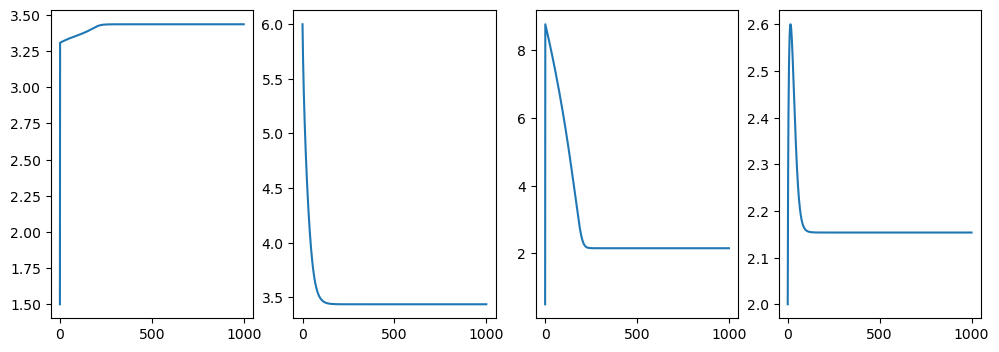

In [269]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i in range(2):
    axes[i].plot(np.array(history_mu)[:,i])
    axes[i+2].plot(np.array(history_sigma)[:,i])
